In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import itertools
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
def getsoup(link):
    '''
   Create a BeautifulSoup object from the URL given
    '''
    r = requests.get(link)
    soup = BeautifulSoup(r.text,'lxml')
    return(soup)

In [5]:
class Result:
    def __init__(self):
        self.tab_ucast = None
        self.tab_vysledek = None
    
    def prt_ucast(self):
        print(self.tab_ucast)
        
    def prt_vysledek(self):
        print(self.tab_vysledek)
        
        

# Voter turnout
tabulky volebni ucasti v jednotlivych volbach a letech jsou ulozeny v promennych:
   
   list_scrape_prez - prezidenttial election, years 2013, 2018
   
   list_scrape_par - parlamential election, years 1996, 1998, 2002, 2006, 2010, 2013, 2017
   
   list_scrape_kraj - regional election, years 2000, 2004, 2008, 2012, 2016, 2020
   
   list_scrape_eu - European parliament election, years 2004, 2009, 2014, 2019

## Presidential election

In [6]:
def gettable_prez(soup):
    '''
   Create a table from the BeautifulSoup object given (presidential election format)
    '''
    table=soup.find('table',{'id':'pe41_t1'}).findAll('tr')
    tb= table[2:16]
    return(tb)


In [7]:
def scrapetable_prez(table, year):
    '''
   Create a DataFrame table with regions and respective polls (presidential election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        kraj = row.findAll('td')[1].text
        try:
          ucast = float(row.findAll('td',{'class':'cislo'})[5].text.replace(",","."))
        except ValueError:
          ucast = 0
        row1 = pd.Series({"Kraj":kraj,"Účast":ucast})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
   
    df_scraped = df_scraped.T
    df_scraped['year'] = year
    return(df_scraped)

In [8]:

soup_prez_2013 = getsoup('https://volby.cz/pls/prez2013/pe41?xjazyk=CZ&xv=1')
soup_prez_2018 = getsoup('https://volby.cz/pls/prez2018/pe41?xjazyk=CZ&xv=1')

In [9]:
list_soup_prez = [soup_prez_2013, soup_prez_2018]
years_prez = [2013, 2018]

list_table_prez = []
for year in list_soup_prez:
    list_table_prez.append(gettable_prez(year))

In [10]:
list_scrape_prez = []
i=0
for year in list_table_prez:
    list_scrape_prez.append(scrapetable_prez(year, years_prez[i]))
    i+=1

In [11]:
prezidentske = Result()
prezidentske.tab_ucast = list_scrape_prez
prezidentske.prt_ucast()

[                   Kraj  Účast  year
0    Hlavní město Praha   65.1  2013
0      Středočeský kraj  63.96  2013
0        Jihočeský kraj  63.63  2013
0         Plzeňský kraj  61.97  2013
0      Karlovarský kraj  52.35  2013
0          Ústecký kraj  52.66  2013
0        Liberecký kraj   59.1  2013
0  Královéhradecký kraj  64.65  2013
0       Pardubický kraj  64.86  2013
0         Kraj Vysočina  66.79  2013
0     Jihomoravský kraj  62.28  2013
0        Olomoucký kraj  60.14  2013
0          Zlínský kraj  62.45  2013
0  Moravskoslezský kraj  56.17  2013,                    Kraj  Účast  year
0    Hlavní město Praha  67.56  2018
0      Středočeský kraj  64.73  2018
0        Jihočeský kraj  63.25  2018
0         Plzeňský kraj  61.44  2018
0      Karlovarský kraj  52.11  2018
0          Ústecký kraj  52.76  2018
0        Liberecký kraj  60.74  2018
0  Královéhradecký kraj  64.19  2018
0       Pardubický kraj  64.98  2018
0         Kraj Vysočina  67.01  2018
0     Jihomoravský kraj  62.56  2018

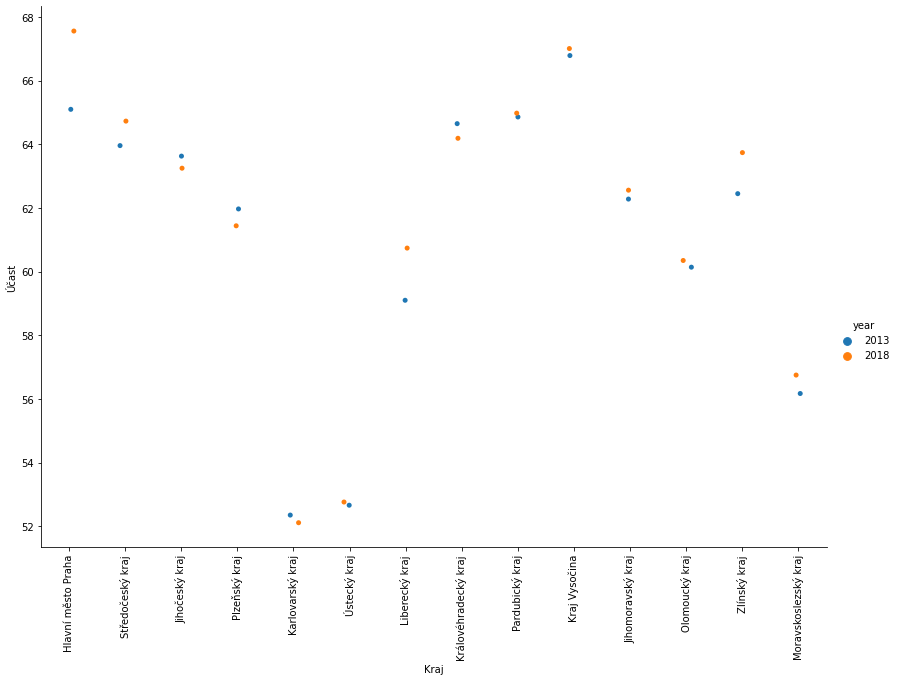

In [12]:

all_prez = pd.concat(list_scrape_prez)


p = sns.catplot(data=all_prez,x='Kraj', y="Účast", hue="year",height=8.27, aspect=11.7/8.27)
p.set_xticklabels(rotation=90)

In [102]:
all_prez["Účast"] = all_prez["Účast"].astype(float)
all_prez["Účast"][0:14]

0    65.10
0    63.96
0    63.63
0    61.97
0    52.35
0    52.66
0    59.10
0    64.65
0    64.86
0    66.79
0    62.28
0    60.14
0    62.45
0    56.17
Name: Účast, dtype: float64

In [14]:
all_prez.groupby('year').mean()

,Účast
year,
2013,61.150714
2018,61.583571


Text(0.5, 1.0, 'Voter turnout of presidential election in 2013 and 2018')

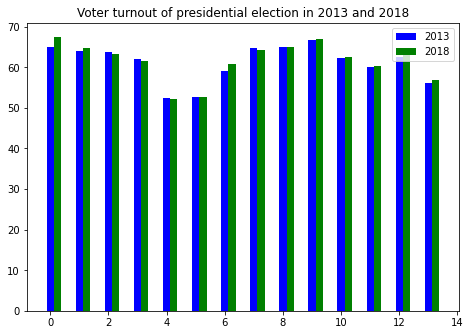

In [108]:
X = np.arange(14)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, all_prez["Účast"][0:14], color = 'b', width = 0.25)
ax.bar(X + 0.25, all_prez["Účast"][14:28], color = 'g', width = 0.25)
ax.legend(labels=['2013', '2018'])
ax.set_title('Voter turnout of presidential election in 2013 and 2018')

In [55]:
avg_prez = all_prez.groupby('Kraj').mean()
kraj_prez = all_prez["Kraj"][0:14]

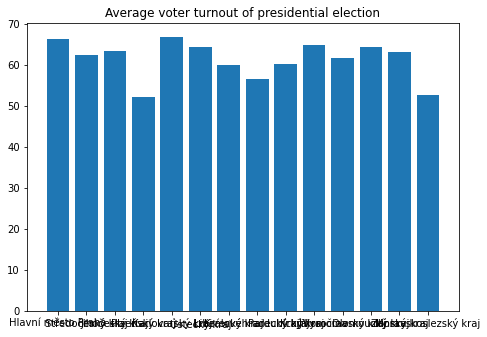

In [109]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
kr = kraj_prez
avg = avg_prez["Účast"]
ax.bar(kr,avg)
ax.set_title('Average voter turnout of presidential election')
plt.show()

## Pariament election

In [44]:
def gettable_par_before1998(soup):
    '''
   Create a table from the BeautifulSoup object given (parlamential election format)
    '''
    table=soup.find('table').findAll('tr')
    tb = table[2:10]
    return(tb)


In [45]:
def gettable_par_after1998(soup):
    '''
   Create a table from the BeautifulSoup object given (parlamential election format)
    '''
    table=soup.find('table').findAll('tr')
    tb = table[2:16]
    return(tb)

In [46]:
def scrapetable_par(table, year):
    '''
   Create a DataFrame table with regions and respective polls (parlamentiar election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        kraj = row.findAll('td')[1].text.replace("kraj","").strip()
        kraj = kraj.replace("Kraj", "").strip()
        if kraj == "Praha":
          kraj = "Hlavní město Praha"
        ucast = float(row.findAll('td')[7].text.replace(",","."))
        row1 = pd.Series({"Kraj":kraj,"Ucast":ucast})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year']= year
    return(df_scraped)

In [47]:
soup_par_1996 = getsoup('https://volby.cz/pls/ps1996/u52')
soup_par_1998 = getsoup('https://volby.cz/pls/ps1998/u52')
soup_par_2002 = getsoup('https://volby.cz/pls/ps2002/ps5?xjazyk=CZ')
soup_par_2006 = getsoup('https://volby.cz/pls/ps2006/ps4?xjazyk=CZ')
soup_par_2010 = getsoup('https://volby.cz/pls/ps2010/ps4?xjazyk=CZ')
soup_par_2013 = getsoup('https://volby.cz/pls/ps2013/ps4?xjazyk=CZ')
soup_par_2017 = getsoup('https://volby.cz/pls/ps2017/ps4?xjazyk=CZ')


In [48]:

soup_par = np.empty(7, dtype=object)
soup_par[0] = soup_par_1996
soup_par[1] = soup_par_1998
soup_par[2] = soup_par_2002
soup_par[3] = soup_par_2006
soup_par[4] = soup_par_2010
soup_par[5] = soup_par_2013
soup_par[6] = soup_par_2017


In [49]:
years_par = [1996, 1998, 2002, 2006, 2010, 2013, 2017]
list_soup_par_before1998 = [soup_par_1996, soup_par_1998]
list_soup_par_after1998 = [soup_par_2002, soup_par_2006, soup_par_2010, soup_par_2013, soup_par_2017]


list_table_par_before1998 = []
for year in list_soup_par_before1998:
    list_table_par_before1998.append(gettable_par_before1998(year))
   

list_table_par_after1998 = []
for year in list_soup_par_after1998:
    list_table_par_after1998.append(gettable_par_after1998(year))
 


In [50]:

i=0
list_scrape_par = []
for year in list_table_par_before1998:
    list_scrape_par.append(scrapetable_par(year, years_par[i]))
    i+=1
for year in list_table_par_after1998:
    list_scrape_par.append(scrapetable_par(year, years_par[i]))
    i+=1

In [51]:
parlamentni = Result()
parlamentni.tab_ucast = list_scrape_par
parlamentni.prt_ucast()


[                 Kraj  Ucast  year
0  Hlavní město Praha  69.73  1996
0         Středočeský  78.35  1996
0           Jihočeský  77.67  1996
0         Západočeský  74.56  1996
0         Severočeský  72.79  1996
0        Východočeský  80.44  1996
0        Jihomoravský  79.26  1996
0      Severomoravský   76.8  1996,                  Kraj  Ucast  year
0  Hlavní město Praha  71.62  1998
0         Středočeský  76.38  1998
0           Jihočeský  75.24  1998
0         Západočeský  72.19  1998
0         Severočeský  69.89  1998
0        Východočeský  77.64  1998
0        Jihomoravský  76.06  1998
0      Severomoravský  72.72  1998,                  Kraj  Ucast  year
0  Hlavní město Praha  59.98  2002
0         Středočeský  58.78  2002
0           Jihočeský  58.11  2002
0            Plzeňský     58  2002
0         Karlovarský  50.17  2002
0             Ústecký  50.65  2002
0           Liberecký  55.83  2002
0     Královéhradecký  60.84  2002
0          Pardubický  61.14  2002
0            Vyso

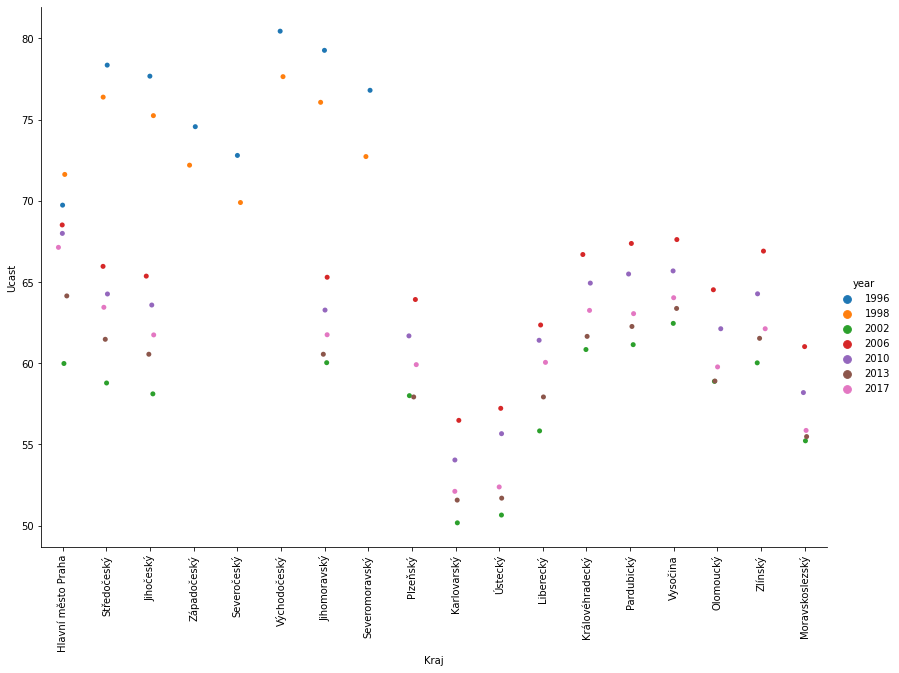

In [52]:
all_par = pd.concat(list_scrape_par)
pa = sns.catplot(data=all_par,x='Kraj', y="Ucast", hue="year",height=8.27, aspect=11.7/8.27)
pa.set_xticklabels(rotation=90)


In [53]:
all_par["Účast"] = all_par["Ucast"].astype(float)
all_par.groupby('year').mean()

,Účast
year,
1996,76.200000
1998,73.967500
2002,57.864286
2006,64.228571
2010,62.326429
2013,59.214286
2017,60.470714


In [24]:
all_par.groupby('Kraj').mean()

,year,Účast
Kraj,,
Hlavní město Praha,2006.0,67.014286
Jihomoravský,2006.0,66.601429
Jihočeský,2006.0,66.035714
Karlovarský,2009.6,52.874000
Královéhradecký,2009.6,63.472000
Liberecký,2009.6,59.512000
Moravskoslezský,2009.6,57.154000
Olomoucký,2009.6,60.838000
Pardubický,2009.6,63.862000


In [65]:
avg_par = all_par.groupby('Kraj').mean()
kraj_par = all_par["Kraj"][0:len(avg_par)]

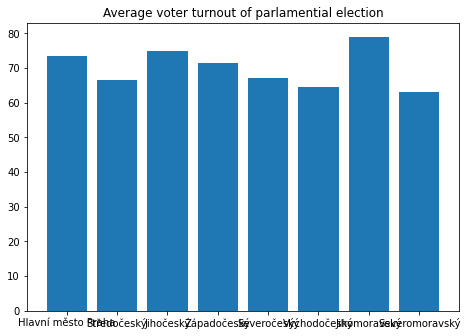

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
kr = kraj_par
avg = avg_par["Účast"]
ax.bar(kr,avg)
ax.set_title('Average voter turnout of parlamential election')
plt.show()

## Regional election

In [69]:
def gettable_kraj(soup):
    '''
   Create a table from the BeautifulSoup object given (regional election format)
   There are only 13 regions because Prague is not counted.
    '''
    table=soup.find('table').findAll('tr')
    tb = table[2:15]
    return(tb)

In [70]:
def scrapetable_kraj(table,year):
    '''
   Create a DataFrame table with regions and respective polls (regional election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        kraj = row.findAll('td')[1].text.strip()
        if kraj == 'Vysočina':
            kraj = 'Kraj Vysočina'

        ucast = float(row.findAll('td')[7].text.replace(",","."))
        print(ucast)
        row1 = pd.Series({"Kraj":kraj,"Ucast":ucast})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] =  year
    return(df_scraped)

In [71]:
soup_kraj_2000 = getsoup('https://volby.cz/pls/kz2000/kz4?xjazyk=CZ&xdatum=20001112')
soup_kraj_2004 = getsoup('https://volby.cz/pls/kz2004/kz4?xjazyk=CZ&xdatum=20041105')
soup_kraj_2008 = getsoup('https://volby.cz/pls/kz2008/kz4?xjazyk=CZ&xdatum=20081017')
soup_kraj_2012 = getsoup('https://volby.cz/pls/kz2012/kz4?xjazyk=CZ&xdatum=20121012')
soup_kraj_2016 = getsoup('https://volby.cz/pls/kz2016/kz4?xjazyk=CZ&xdatum=20161007')
soup_kraj_2020 = getsoup('https://volby.cz/pls/kz2020/kz4?xjazyk=CZ')

In [72]:
list_soup_kraj = (soup_kraj_2000, soup_kraj_2004, soup_kraj_2008, soup_kraj_2012, soup_kraj_2016, soup_kraj_2020)

list_table_kraj = []
for year in list_soup_kraj:
    list_table_kraj.append(gettable_kraj(year))
   

In [113]:
years_kraj = [2000,2004,2008,2012,2016,2020]
list_scrape_kraj = []
i=0
for year in list_table_kraj:
    list_scrape_kraj.append(scrapetable_kraj(year, years_kraj[i]))
    i+=1

32.77
34.13
35.55
28.44
29.68
33.07
34.74
36.46
35.86
34.93
34.19
36.07
32.24
30.73
30.45
31.34
24.99
25.37
30.83
32.56
32.6
31.82
29.71
28.44
30.63
27.55
42.14
40.78
40.28
35.01
37.44
38.08
41.72
42.61
44.88
41.05
38.5
41.13
38.6
36.45
38.59
38.21
31.57
33.94
38.55
38.43
39.47
41.05
37.76
35.67
40.34
33.17
34.76
36.31
35.74
30.23
28.94
35.91
37.33
36.8
37.34
36.84
33.2
38.5
30.58
40.66
39.51
38.8
34.94
31.3
40.41
41.01
40.87
39.65
38.82
37.29
41.19
32.71


In [74]:
krajske = Result()
krajske.tab_ucast = list_scrape_kraj
krajske.prt_ucast()

[                   Kraj  Ucast  year
0      Středočeský kraj  32.77  2000
0      Budějovický kraj  34.13  2000
0         Plzeňský kraj  35.55  2000
0      Karlovarský kraj  28.44  2000
0          Ústecký kraj  29.68  2000
0        Liberecký kraj  33.07  2000
0  Královéhradecký kraj  34.74  2000
0       Pardubický kraj  36.46  2000
0        Jihlavský kraj  35.86  2000
0         Brněnský kraj  34.93  2000
0        Olomoucký kraj  34.19  2000
0          Zlínský kraj  36.07  2000
0        Ostravský kraj  32.24  2000,                    Kraj  Ucast  year
0      Středočeský kraj  30.73  2004
0        Jihočeský kraj  30.45  2004
0         Plzeňský kraj  31.34  2004
0      Karlovarský kraj  24.99  2004
0          Ústecký kraj  25.37  2004
0        Liberecký kraj  30.83  2004
0  Královéhradecký kraj  32.56  2004
0       Pardubický kraj   32.6  2004
0         Kraj Vysočina  31.82  2004
0     Jihomoravský kraj  29.71  2004
0        Olomoucký kraj  28.44  2004
0          Zlínský kraj  30.63  2004

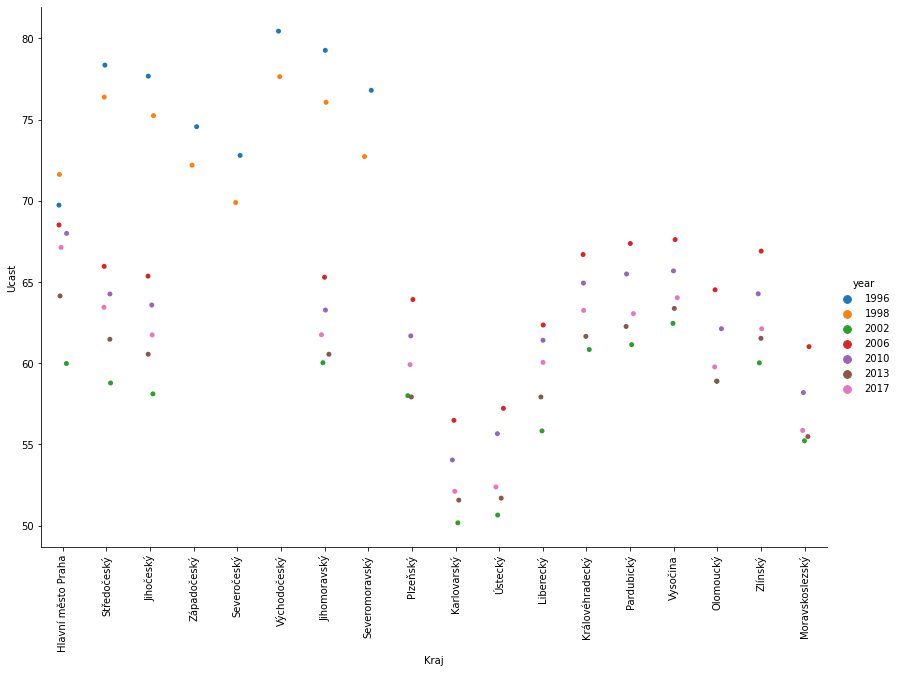

In [75]:
all_kraj = pd.concat(list_scrape_kraj)
kr = sns.catplot(data=all_par,x='Kraj', y="Ucast", hue="year",height=8.27, aspect=11.7/8.27)
kr.set_xticklabels(rotation=90)

In [76]:
all_kraj["Ucast"] = all_kraj["Ucast"].astype(float)
all_kraj.groupby('year').mean()

,Ucast
year,
2000,33.702308
2004,29.770769
2008,40.170769
2012,37.169231
2016,34.806154
2020,38.243077


In [77]:
all_kraj.groupby('Kraj').mean()

,Ucast,year
Kraj,,
Brněnský kraj,34.930000,2000
Budějovický kraj,34.130000,2000
Jihlavský kraj,35.860000,2000
Jihomoravský kraj,36.836000,2012
Jihočeský kraj,37.128000,2012
Karlovarský kraj,30.863333,2010
Kraj Vysočina,38.948000,2012
Královéhradecký kraj,37.631667,2010
Liberecký kraj,36.141667,2010


In [78]:
avg_kraj = all_kraj.groupby('Kraj').mean()
kraj_kraj = all_kraj["Kraj"][0:len(avg_kraj)]

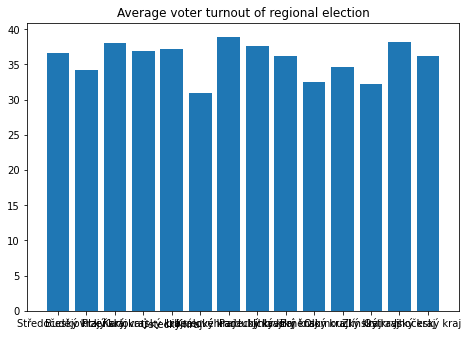

In [111]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
kr = kraj_kraj
avg = avg_kraj["Ucast"]
ax.bar(kr,avg)
ax.set_title('Average voter turnout of regional election')
plt.show()

## European parliament election

In [81]:
def gettable_eu(soup):
    '''
   Create a table from the BeautifulSoup object given (european parliament election format)
    '''
    table=soup.find('table').findAll('tr')
    tb = table[2:16]
    return(tb)

In [82]:
def scrapetable_eu(table,year):
    '''
   Create a DataFrame table with regions and respective polls (european parliament election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        kraj = row.findAll('th')[0].text
        if kraj == 'Vysočina':
            kraj = 'Kraj Vysočina'
        
        try:
          ucast = float(row.findAll('td')[6].text.replace(",","."))
        except ValueError:
          ucast = 0

        row1 = pd.Series({"Kraj":kraj,"Účast":ucast})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] = year
    return(df_scraped)

In [83]:
soup_eu_2004 = getsoup('https://volby.cz/pls/ep2004/ep121?xjazyk=CZ')
soup_eu_2009 = getsoup('https://volby.cz/pls/ep2009/ep121?xjazyk=CZ')
soup_eu_2014 = getsoup('https://volby.cz/pls/ep2014/ep121?xjazyk=CZ')
soup_eu_2019 = getsoup('https://volby.cz/pls/ep2019/ep121?xjazyk=CZ')

In [84]:
list_soup_eu = (soup_eu_2004, soup_eu_2009, soup_eu_2014, soup_eu_2019)

list_table_eu = []
for year in list_soup_eu:
    list_table_eu.append(gettable_eu(year))

In [85]:
list_scrape_eu = []
years_eu = [2004,2009,2014,2019]
i=0
for year in list_table_eu:
    list_scrape_eu.append(scrapetable_eu(year, years_eu[i]))
    i+=1

In [86]:
evropske = Result()
evropske.tab_ucast = list_scrape_eu
evropske.prt_ucast()

[                   Kraj  Účast  year
0    Hlavní město Praha  34.61  2004
0      Středočeský kraj  29.33  2004
0        Jihočeský kraj  27.29  2004
0         Plzeňský kraj  28.96  2004
0      Karlovarský kraj  23.21  2004
0          Ústecký kraj  23.11  2004
0        Liberecký kraj  26.96  2004
0  Královéhradecký kraj  30.23  2004
0       Pardubický kraj   29.4  2004
0         Kraj Vysočina  29.05  2004
0     Jihomoravský kraj  29.66  2004
0        Olomoucký kraj  27.23  2004
0          Zlínský kraj  29.04  2004
0  Moravskoslezský kraj  24.04  2004,                    Kraj  Účast  year
0    Hlavní město Praha  35.73  2009
0      Středočeský kraj  29.35  2009
0        Jihočeský kraj  27.69  2009
0         Plzeňský kraj  28.09  2009
0      Karlovarský kraj  21.75  2009
0          Ústecký kraj  22.51  2009
0        Liberecký kraj  26.65  2009
0  Královéhradecký kraj  29.19  2009
0       Pardubický kraj  28.97  2009
0         Kraj Vysočina  28.86  2009
0     Jihomoravský kraj  28.64  2009

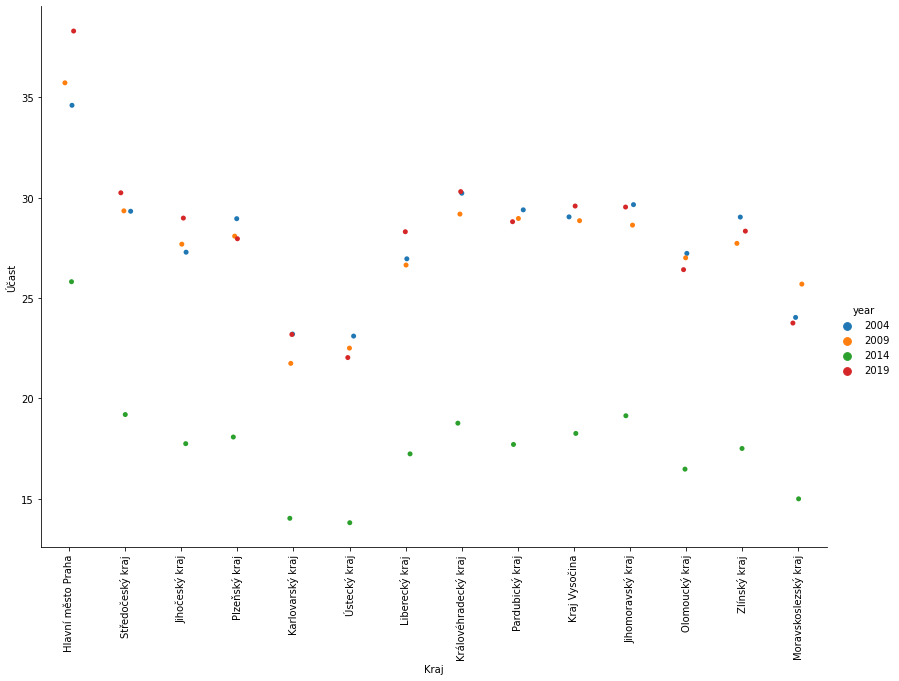

In [87]:
all_eu = pd.concat(list_scrape_eu)
eu = sns.catplot(data=all_eu,x='Kraj', y="Účast", hue="year",height=8.27, aspect=11.7/8.27)
eu.set_xticklabels(rotation=90)

In [88]:
all_eu

,Kraj,Účast,year
0,Hlavní město Praha,34.61,2004
0,Středočeský kraj,29.33,2004
0,Jihočeský kraj,27.29,2004
0,Plzeňský kraj,28.96,2004
0,Karlovarský kraj,23.21,2004
0,Ústecký kraj,23.11,2004
0,Liberecký kraj,26.96,2004
0,Královéhradecký kraj,30.23,2004
0,Pardubický kraj,29.4,2004
0,Kraj Vysočina,29.05,2004


In [89]:
all_eu["Účast"] = all_eu["Účast"].astype(float)
all_eu.groupby('year').mean()

,Účast
year,
2004,28.008571
2009,27.705000
2014,17.771429
2019,28.272857


In [90]:
all_eu.groupby('Kraj').mean()

,Účast,year
Kraj,,
Hlavní město Praha,33.6175,2011.5
Jihomoravský kraj,26.7450,2011.5
Jihočeský kraj,25.4300,2011.5
Karlovarský kraj,20.5450,2011.5
Kraj Vysočina,26.4400,2011.5
Královéhradecký kraj,27.1250,2011.5
Liberecký kraj,24.7900,2011.5
Moravskoslezský kraj,22.1250,2011.5
Olomoucký kraj,24.2850,2011.5


In [91]:
avg_eu = all_eu.groupby('Kraj').mean()
kraj_eu = all_eu["Kraj"][0:len(avg_eu)]

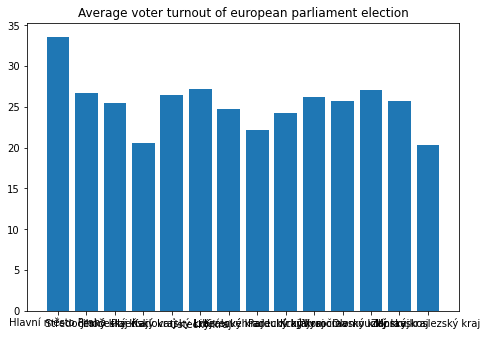

In [112]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
kr = kraj_eu
avg = avg_eu["Účast"]
ax.bar(kr,avg)
ax.set_title('Average voter turnout of european parliament election')
plt.show()

We can conclude that the voter turnout is the highest for the presidential election, and lowest for european parliament election. It can be explained by the psychological effect that people generally don't feal a real impact of their vote in European alection. On the other hand, presidential and parliamential elections are perceived to touch the people's life more closely to them. 

Concerning the differences between regions, we see that the highest voter turnout is int most of the type of election in the Capital. The regions with the lowest voter turnout are Ústecký kraj and Karlovarský kraj but the difference accross the Czech Republic is not significant.

We can also see that the voter turnout vary a lot over years, the trend is the mostly the same in all regions. However we cannot say that the trend is increasing or decreasing. There might be some other impacts influencing the voter turnout.


There is a possible extension of the analysis in relating the voter turnout to tightness of the final result. The idea is to exploit whether the tighter expected result might motivate people to participate in the election. For that the following data will be used.

# Election results

## Presidential

In [44]:
def getresults_prez(soup):
    '''
   Create a table from the BeautifulSoup object given (presidential election format)
    '''
    table=soup.find('table', id="pe2_t2").findAll('tr')
    tb = table[2:16]
    return(tb)

In [45]:

def scraperesults_prez(table,year):
    '''
   Create a DataFrame table with regions and respective polls (presidential election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        kandidat = row.findAll('td')[1].text
        try:
          vysledek = float(row.findAll('td')[5].text.replace(",","."))
        except:
          vysledek = 0

        row1 = pd.Series({"Kandidat":kandidat,"Vysledek":vysledek})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] = year
    return(df_scraped)

In [46]:
soup_prez_res_2013 = getsoup('https://volby.cz/pls/prez2013/pe2?xjazyk=CZ')
soup_prez_res_2018 = getsoup('https://volby.cz/pls/prez2018/pe2?xjazyk=CZ')

In [47]:
list_soup_prez_res = (soup_prez_res_2013, soup_prez_res_2018)


list_tab_res_prez = []
for year in list_soup_prez_res:
    list_tab_res_prez.append(getresults_prez(year))

In [48]:
list_res_prez = []
i=0
for year in list_tab_res_prez:
    list_res_prez.append(scraperesults_prez(year, years_prez[i]))
    i+=1

In [49]:
prezidentske.tab_vysledek = list_res_prez
prezidentske.prt_vysledek()

[                     Kandidat Vysledek  year
0   Roithová Zuzana MUDr. MBA     4.95  2013
0       Fischer Jan Ing. CSc.    16.35  2013
0        Bobošíková Jana Ing.     2.39  2013
0           Fischerová Taťana     3.23  2013
0       Sobotka Přemysl MUDr.     2.46  2013
0            Zeman Miloš Ing.    24.21  2013
0  Franz Vladimír Prof. JUDr.     6.84  2013
0             Dienstbier Jiří    16.12  2013
0         Schwarzenberg Karel     23.4  2013,                                   Kandidat Vysledek  year
0                     Topolánek Mirek Ing.      4.3  2018
0                Horáček Michal Mgr. Ph.D.     9.18  2018
0                       Fischer Pavel Mgr.    10.23  2018
0                         Hynek Jiří RNDr.     1.23  2018
0                         Hannig Petr Mgr.     0.56  2018
0        Kulhánek Vratislav Ing. Dr. h. c.     0.47  2018
0                         Zeman Miloš Ing.    38.56  2018
0             Hilšer Marek MUDr. Bc. Ph.D.     8.83  2018
0  Drahoš Jiří prof. Ing. 

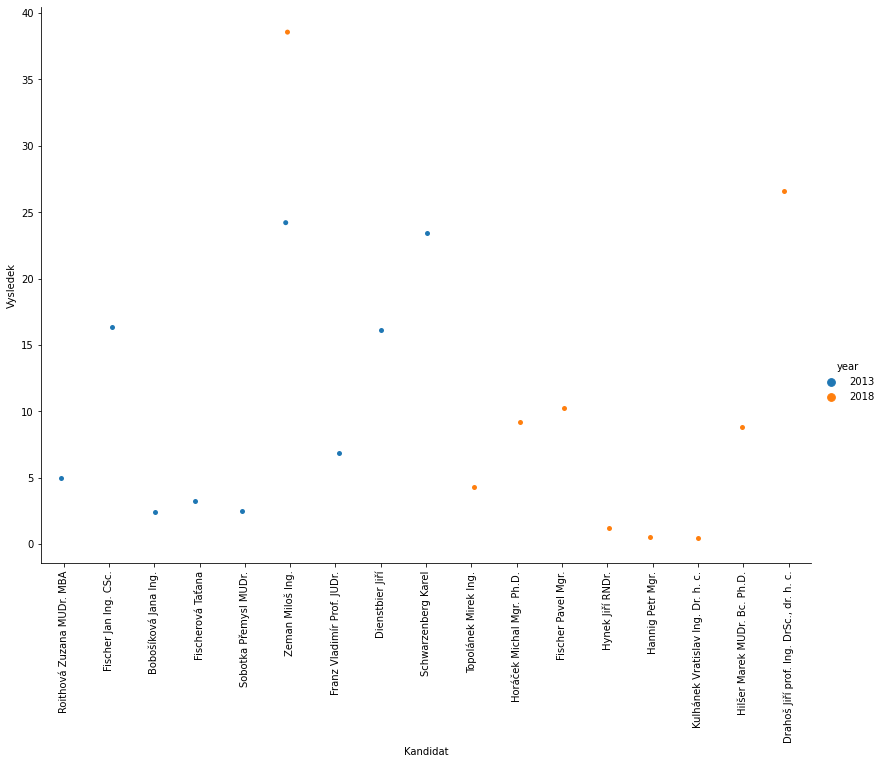

In [50]:
all_prez = pd.concat(list_res_prez)
g = sns.catplot(data=all_prez,x='Kandidat', y="Vysledek", hue="year",height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=90)


## Parliament

In [51]:
def getresults_par_before2002(soup):
    '''
   Create a table from the BeautifulSoup object given (parliament election format)
    '''
    table=soup.findAll('table')[1].findAll('tr')
    tb = table[2:20]
    return(tb)

In [52]:
def getresults_par_after2002(soup):
    '''
   Create a table from the BeautifulSoup object given (parliament election format)
    '''
    table=soup.findAll('table')[2].findAll('tr')
    tb = table[2:20]
    return(tb)

In [53]:

def scraperesults_par_before2002(table,year):
    '''
   Create a DataFrame table with regions and respective polls (parliament election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        strana1 = row.findAll('td')[1].text
        vysledek1 = float(row.findAll('td')[3].text.replace(",","."))
        strana2 = row.findAll('td')[6].text
        vysledek2 = float(row.findAll('td')[8].text.replace(",","."))
        row1 = pd.Series({"Strana":strana1,"Vysledek":vysledek1})
        row2 = pd.Series({"Strana":strana2,"Vysledek":vysledek2})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
        df_scraped = pd.concat([df_scraped, row2], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year']=year
    return(df_scraped)

In [54]:
def scraperesults_par_after2002(table1, table2,year):
    '''
   Create a DataFrame table with regions and respective polls (parliament election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table1:
        strana1 = row.findAll('td')[1].text
        try:
          vysledek1 = float(row.findAll('td')[3].text.replace(",","."))
        except ValueError:
          vysledek1 = 0
        row1 = pd.Series({"Strana":strana1,"Vysledek":vysledek1})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    for row in table2:
        strana2 = row.findAll('td')[1].text
        try:
          vysledek2 = float(row.findAll('td')[3].text.replace(",","."))
        except ValueError:
          vysledek2 = 0
        row2 = pd.Series({"Strana":strana2,"Vysledek":vysledek2})  
        df_scraped = pd.concat([df_scraped, row2], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] =  year
    return(df_scraped)

In [55]:
soup_par_res_1996 = getsoup('https://volby.cz/pls/ps1996/u4')
soup_par_res_1998 = getsoup('https://volby.cz/pls/ps1998/u4')
soup_par_res_2002 = getsoup('https://volby.cz/pls/ps2002/ps2?xjazyk=CZ')
soup_par_res_2006 = getsoup('https://volby.cz/pls/ps2006/ps2?xjazyk=CZ')
soup_par_res_2010 = getsoup('https://volby.cz/pls/ps2010/ps2?xjazyk=CZ')
soup_par_res_2013 = getsoup('https://volby.cz/pls/ps2013/ps2?xjazyk=CZ')
soup_par_res_2017 = getsoup('https://volby.cz/pls/ps2017nss/ps2?xjazyk=CZ')

In [56]:
list_soup_par_res1 = [soup_par_res_1996,soup_par_res_1998,soup_par_res_2002]

list_tab_res_par1 = []
i=0
for year in list_soup_par_res1:
    list_tab_res_par1.append(getresults_par_before2002(year))
    i+=1

In [57]:
list_soup_par_res2 = [soup_par_res_2006, soup_par_res_2010, soup_par_res_2013, soup_par_res_2017]


list_tab_res_par12 = []
for year in list_soup_par_res2:
    list_tab_res_par12.append(getresults_par_before2002(year))


list_tab_res_par22 = []
for year in list_soup_par_res2:
    list_tab_res_par22.append(getresults_par_after2002(year))


In [58]:

list_res_par = []
i=0
for year in list_tab_res_par1:
    list_res_par.append(scraperesults_par_before2002(year, years_par[i]))
    i+=1

for j in range(4):
    list_res_par.append(scraperesults_par_after2002(list_tab_res_par12[j], list_tab_res_par22[j], years_par[i]))
    i+=1

In [59]:
parlamentni.tab_vysledek = list_res_par
parlamentni.prt_vysledek()


[                           Strana Vysledek  year
0         Svobodní demokraté-LSNS     2.05  1996
0     Důchodci za životní jistoty     3.09  1996
0   Česká str.sociál.demokratická    26.44  1996
0      Strana demokratické levice     0.13  1996
0    Občanská demokratická strana    29.62  1996
0       Českomoravská unie středu     0.45  1996
0                      Pravý blok        0  1996
0                   Česká pravice     0.05  1996
0                       Nezávislí      0.5  1996
0  Komunistická str.Čech a Moravy    10.33  1996
0  Mor.nár.str.-Hn.slezskom.sjed.     0.27  1996
0                 Strana zelených        0  1996
0               Demokratická unie      2.8  1996
0  Sdruž.pro rep.-Republ.str.Čsl.     8.01  1996
0   Občanská demokratická aliance     6.36  1996
0                       Levý blok      1.4  1996
0    Strana českosloven.komunistů        0  1996
0  Hn.samosp.M.aSl.-Mor.nár.sjed.     0.42  1996
0    Křesť.a dem.unie-Čs.str.lid.     8.08  1996
0         Celostátn

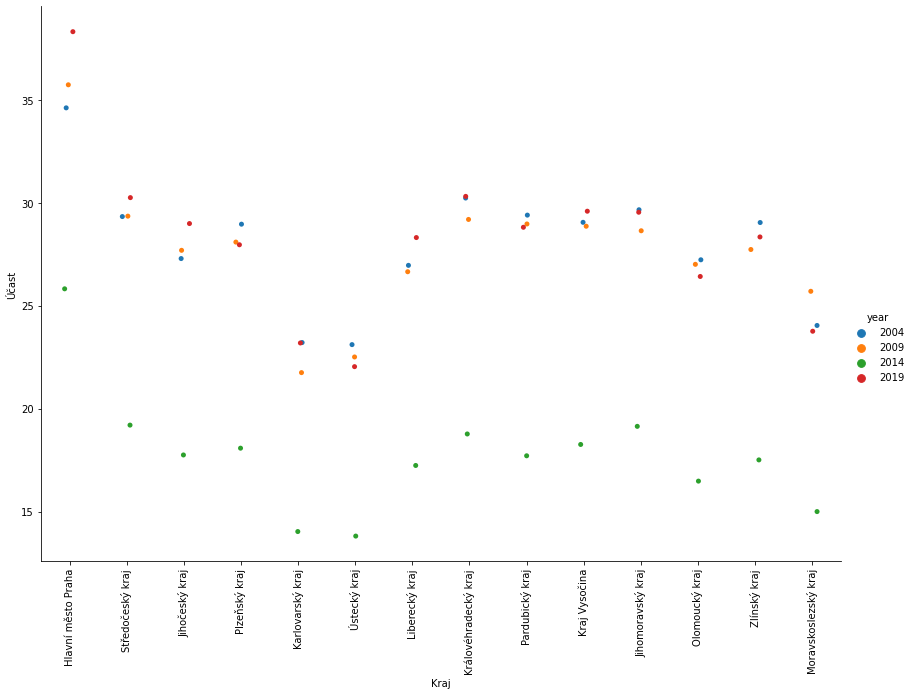

In [60]:
all_eu = pd.concat(list_scrape_eu)
kr = sns.catplot(data=all_eu,x='Kraj', y="Účast", hue="year",height=8.27, aspect=11.7/8.27)
kr.set_xticklabels(rotation=90)


## European election

In [61]:
def getresults_eu1(soup):
    '''
   Create a table from the BeautifulSoup object given (european election format)
    '''
    table=soup.findAll('table')[1].findAll('tr')
    tb = table[2:30]
    return(tb)

In [62]:
def getresults_eu2(soup):
    '''
   Create a table from the BeautifulSoup object given (european election format)
    '''
    table=soup.findAll('table')[2].findAll('tr')
    tb = table[2:20]
    return(tb)

In [63]:
def scraperesults_eu1(table1, table2,year):
    '''
   Create a DataFrame table with regions and respective polls (european parliament election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table1:
        strana1 = row.findAll('td')[1].text
        try:
          vysledek1 = float(row.findAll('td')[3].text.replace(",","."))
        except ValueError:
          vysledek1 = 0

        row1 = pd.Series({"Strana":strana1,"Vysledek":vysledek1})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    for row in table2:
        strana2 = row.findAll('td')[1].text
        try:
          vysledek2 = float(row.findAll('td')[3].text.replace(",","."))
        except ValueError:
          vysledek2 = 0
        row2 = pd.Series({"Strana":strana2,"Vysledek":vysledek2})  
        df_scraped = pd.concat([df_scraped, row2], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] = year
    return(df_scraped)

In [64]:
soup_eu_res_2004 = getsoup('https://volby.cz/pls/ep2004/ep11?xjazyk=CZ')
soup_eu_res_2009 = getsoup('https://volby.cz/pls/ep2009/ep11?xjazyk=CZ')
soup_eu_res_2014 = getsoup('https://volby.cz/pls/ep2014/ep11?xjazyk=CZ')
soup_eu_res_2019 = getsoup('https://volby.cz/pls/ep2019/ep11?xjazyk=CZ')

In [65]:
list_soup_eu = [soup_eu_res_2004, soup_eu_res_2009, soup_eu_res_2014, soup_eu_res_2019]


list_tab_res_eu12 = []
for year in list_soup_eu:
    list_tab_res_eu12.append(getresults_eu1(year))
    
list_tab_res_eu22 = []
for year in list_soup_eu:
    list_tab_res_eu22.append(getresults_eu2(year))

In [66]:

list_res_eu = []
i=0

for j in range(4):
    list_res_eu.append(scraperesults_eu1(list_tab_res_eu12[j], list_tab_res_eu22[j], years_eu[i]))
    i+=1

In [67]:
evropske.tab_vysledek = list_res_eu
evropske.prt_vysledek()

[                           Strana Vysledek  year
0  SNK sdruž.nez. a Evropští dem.    11.02  2004
0   Koruna Česká (monarch.strana)     0.19  2004
0           Helax-Ostrava se baví     0.14  2004
0    Česká str.sociálně demokrat.     8.78  2004
0                 Národní koalice     0.12  2004
0    Občanská demokratická strana    30.04  2004
0    Str.pro otevřenou společnost     0.23  2004
0      Strana demokrat.socialismu     0.07  2004
0                 Strana zelených     3.16  2004
0            Humanistická aliance     0.17  2004
0            Konzervativní strana     0.21  2004
0           "Sdružení nestraníků"      0.5  2004
0   Strana občanů republiky České     0.11  2004
0  Masarykova demokratická strana     0.18  2004
0       Všeobecná občanská strana     0.03  2004
0                 Dělnická strana     0.18  2004
0                    Strana práce     0.07  2004
0       Balbínova poetická strana     0.59  2004
0   Za zájmy Moravy ve sjedn.Evr.     0.39  2004
0   Křesť.demokr.un

In [68]:
all_prez = pd.concat(list_scrape_prez)
all_prez

,Kraj,Účast,year
0,Hlavní město Praha,65.1,2013
0,Středočeský kraj,63.96,2013
0,Jihočeský kraj,63.63,2013
0,Plzeňský kraj,61.97,2013
0,Karlovarský kraj,52.35,2013
0,Ústecký kraj,52.66,2013
0,Liberecký kraj,59.1,2013
0,Královéhradecký kraj,64.65,2013
0,Pardubický kraj,64.86,2013
0,Kraj Vysočina,66.79,2013


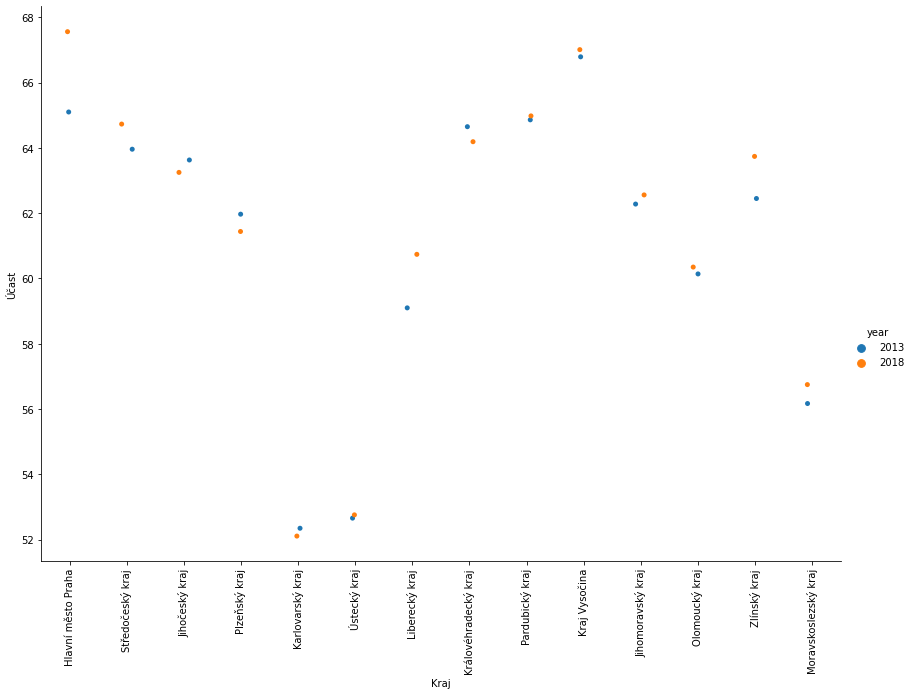

In [69]:
p = sns.catplot(data=all_prez,x='Kraj', y="Účast", hue="year",height=8.27, aspect=11.7/8.27)
p.set_xticklabels(rotation=90)

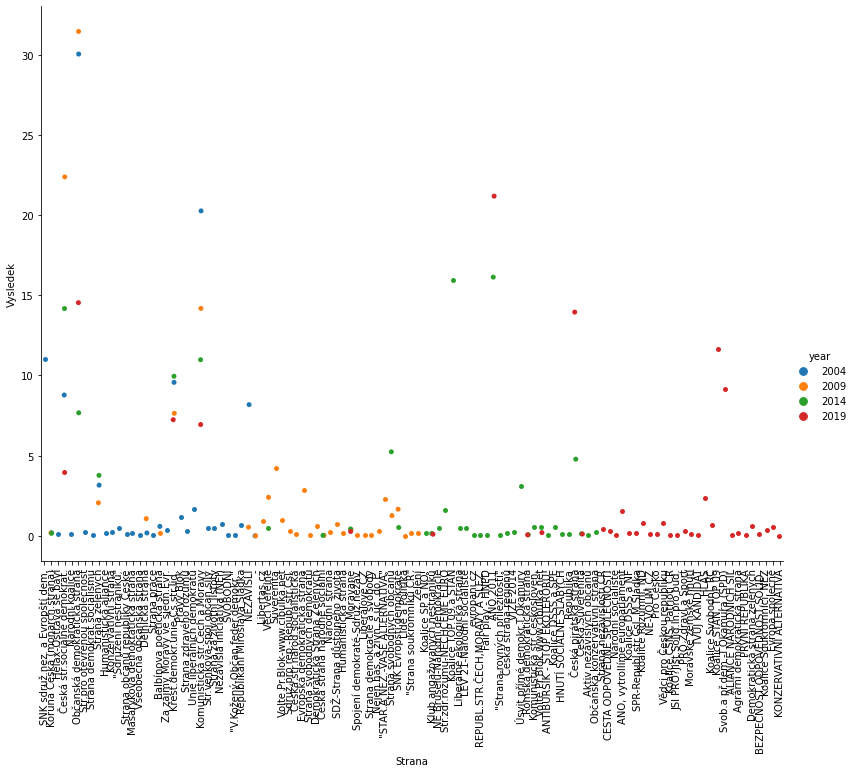

In [70]:

all_eu = pd.concat(list_res_eu)
g = sns.catplot(data=all_eu,x='Strana', y="Vysledek", hue="year",height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=90)
